In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
data=pd.read_excel('C:\\Users\\yadny\\Downloads\\E Commerce Dataset.xlsx')
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [3]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [4]:
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
##To replace the short forms to its orignal form.

data['PreferredPaymentMode']=np.where(data['PreferredPaymentMode']=='CC','Credit Card',data['PreferredPaymentMode'])
data['PreferredPaymentMode']=np.where(data['PreferredPaymentMode']=='COD','Cash on Delivery',data['PreferredPaymentMode'])

In [6]:
data['DaySinceLastOrder']=data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean())
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder                0
CashbackAmount                   0
dtype: int64

In [7]:
def missing_value_treatment(df):
    for col in df.columns:
        print("Treating the",col)
        if (((df[col].dtypes)=='float64')|((df[col].dtypes)=='int64')):
            col_mean=df[col].mean()
            data[col]=data[col].fillna(col_mean)
        else:
             col_mode=data[col].mode()
             data[col]=data[col].fillna(col_mode)
    return df
data=missing_value_treatment(data)
data.isna().sum()

Treating the CustomerID
Treating the Churn
Treating the Tenure
Treating the PreferredLoginDevice
Treating the CityTier
Treating the WarehouseToHome
Treating the PreferredPaymentMode
Treating the Gender
Treating the HourSpendOnApp
Treating the NumberOfDeviceRegistered
Treating the PreferedOrderCat
Treating the SatisfactionScore
Treating the MaritalStatus
Treating the NumberOfAddress
Treating the Complain
Treating the OrderAmountHikeFromlastYear
Treating the CouponUsed
Treating the OrderCount
Treating the DaySinceLastOrder
Treating the CashbackAmount


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [8]:
dummy_x=pd.get_dummies(data,columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'],drop_first=True)
dummy_x

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.000000,3,6.0,3.000000,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,10.189899,1,8.0,3.000000,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,10.189899,1,30.0,2.000000,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.000000,3,15.0,2.000000,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.000000,1,12.0,2.931535,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,1,30.0,3.000000,2,1,6,0,...,0,0,1,0,1,0,0,0,1,0
5626,55627,0,13.000000,1,13.0,3.000000,5,5,6,0,...,0,0,1,0,0,0,0,0,1,0
5627,55628,0,1.000000,1,11.0,3.000000,2,4,3,1,...,0,0,1,0,1,0,0,0,1,0
5628,55629,0,23.000000,3,9.0,4.000000,5,4,4,0,...,0,0,1,0,1,0,0,0,1,0


In [9]:
x=dummy_x.drop('CustomerID',axis=1)
x=x.drop('Churn',axis=1)

In [10]:
x.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,3,6.0,3.000000,3,2,9,1,11.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,10.189899,1,8.0,3.000000,4,3,7,1,15.0,0.0,...,0,1,1,0,0,1,0,0,0,1
2,10.189899,1,30.0,2.000000,4,3,6,1,14.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,0.000000,3,15.0,2.000000,4,5,8,0,23.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,0.000000,1,12.0,2.931535,3,5,3,0,11.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [11]:
y=data['Churn']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
4478,1.000000,1,12.0,3.000000,4,4,3,1,13.0,1.0,...,0,0,0,0,0,0,1,0,0,1
3685,17.000000,1,13.0,4.000000,5,3,3,1,15.0,2.0,...,0,0,0,0,1,0,0,0,0,1
731,0.000000,1,9.0,2.931535,4,3,2,0,12.0,0.0,...,0,0,1,0,0,1,0,0,0,1
291,10.189899,1,8.0,2.000000,3,2,2,1,23.0,1.0,...,0,0,1,0,0,0,1,0,0,0
184,4.000000,1,11.0,2.000000,3,2,1,1,12.0,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,1,27.0,4.000000,4,3,2,0,15.0,2.0,...,0,0,1,0,1,0,0,0,0,1
5191,10.000000,3,16.0,3.000000,4,1,6,0,12.0,5.0,...,1,0,1,0,0,0,0,0,1,0
5226,7.000000,1,11.0,3.000000,5,4,10,0,12.0,2.0,...,0,0,0,0,0,0,1,0,1,0
5390,1.000000,1,36.0,4.000000,4,5,3,0,14.0,2.0,...,0,0,1,0,0,0,1,0,1,0


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_leaf=200,min_samples_split=30,random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=200, min_samples_split=30,
                       random_state=0)

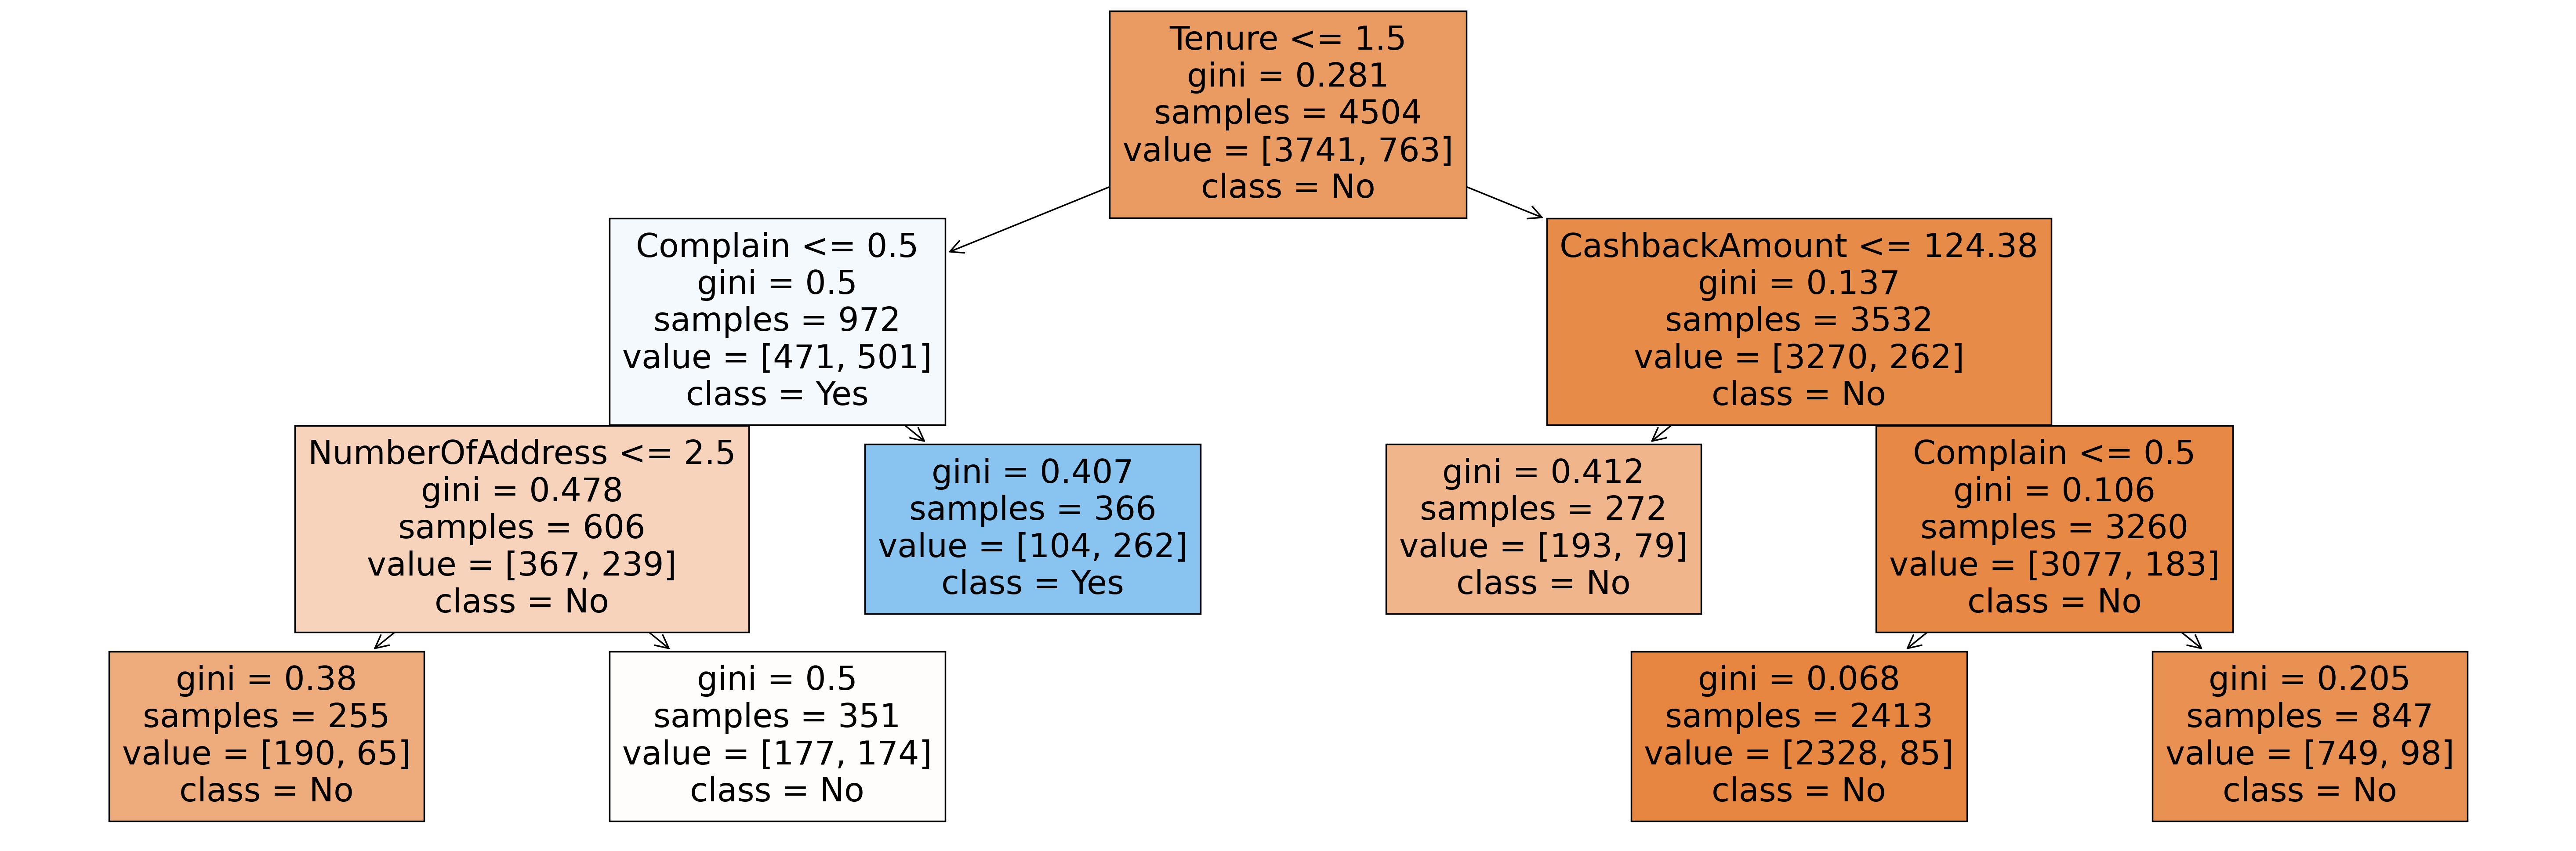

In [14]:
from sklearn import tree
fig=plt.figure(figsize=(30,10),dpi=250)
tree.plot_tree(clf,feature_names=x_train.columns,class_names=['No','Yes'],filled=True);

In [15]:
y_pred_test=clf.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
acc= metrics.accuracy_score(y_test,y_pred_test)
print("ACCURACY=",acc)
acc=metrics.average_precision_score(y_test,y_pred_test)
print("PRECISION =",acc)
acc= metrics.roc_auc_score(y_test,y_pred_test)
print("ROG AUC=",acc)
acc= metrics.recall_score(y_test,y_pred_test)
print("RECALL=",acc)

ACCURACY= 0.8765541740674956
PRECISION = 0.3765238106667947
ROG AUC= 0.6612373265933309
RECALL= 0.34054054054054056


In [17]:
from sklearn.naive_bayes import BernoulliNB
clf_nb_ber=BernoulliNB()
clf_nb_ber.fit(x_train,y_train)

BernoulliNB()

In [18]:
y_pred_test=clf_nb_ber.predict(x_test)
y_pred_test
acc= metrics.accuracy_score(y_test,y_pred_test)
print("ACCURACY=",acc)
acc=metrics.average_precision_score(y_test,y_pred_test)
print("PRECISION =",acc)
acc= metrics.roc_auc_score(y_test,y_pred_test)
print("ROG AUC=",acc)
acc= metrics.recall_score(y_test,y_pred_test)
print("RECALL=",acc)

ACCURACY= 0.8596802841918295
PRECISION = 0.34996064675522726
ROG AUC= 0.6837119797799925
RECALL= 0.42162162162162165


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(x_train,y_train)
y_pred_rf=clf_rf.predict(x_test)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
acc= metrics.accuracy_score(y_test,y_pred_rf)
print("ACCURACY=",acc)
acc=metrics.average_precision_score(y_test,y_pred_rf)
print("PRECISION =",acc)
acc= metrics.roc_auc_score(y_test,y_pred_rf)
print("ROG AUC=",acc)
acc= metrics.recall_score(y_test,y_pred_rf)
print("RECALL=",acc)

ACCURACY= 0.9742451154529307
PRECISION = 0.8681442397497886
ROG AUC= 0.9237929746962691
RECALL= 0.8486486486486486


In [21]:
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
y_pred_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
x_train

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
4478,1.000000,1,12.0,3.000000,4,4,3,1,13.0,1.0,...,0,0,0,0,0,0,1,0,0,1
3685,17.000000,1,13.0,4.000000,5,3,3,1,15.0,2.0,...,0,0,0,0,1,0,0,0,0,1
731,0.000000,1,9.0,2.931535,4,3,2,0,12.0,0.0,...,0,0,1,0,0,1,0,0,0,1
291,10.189899,1,8.0,2.000000,3,2,2,1,23.0,1.0,...,0,0,1,0,0,0,1,0,0,0
184,4.000000,1,11.0,2.000000,3,2,1,1,12.0,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,1,27.0,4.000000,4,3,2,0,15.0,2.0,...,0,0,1,0,1,0,0,0,0,1
5191,10.000000,3,16.0,3.000000,4,1,6,0,12.0,5.0,...,1,0,1,0,0,0,0,0,1,0
5226,7.000000,1,11.0,3.000000,5,4,10,0,12.0,2.0,...,0,0,0,0,0,0,1,0,1,0
5390,1.000000,1,36.0,4.000000,4,5,3,0,14.0,2.0,...,0,0,1,0,0,0,1,0,1,0


In [23]:
y_pred_rf=clf_rf.predict(x_test)
y_pred_rf_proba=clf_rf.predict_proba(x_test)

In [24]:
y_pred_rf_proba

array([[0.1 , 0.9 ],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.95, 0.05],
       [0.97, 0.03],
       [0.97, 0.03]])

In [25]:
y_pred_rf=clf_rf.predict(x_train)
y_pred_rf_proba1=clf_rf.predict_proba(x_train)
y_pred_rf_proba1

array([[0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.95, 0.05],
       ...,
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.12, 0.88]])

In [26]:
#Export an CSV File
#x_train.to_csv("C:\\Users\\yadny\\OneDrive\\Documents\\E Commerce Datasetnew.csv", index=False)